# simplelife Cashflow

This notebook calculates the cash flows of a sample whole life policy. It then outputs a graph depicting the net cash flows, along with a breakdown of the cash flow components.

Click the badge below to run this notebook online on Google Colab. You need a Google account and need to be logged in to it to run this notebook on Google Colab.
[![Run on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lifelib-dev/lifelib/blob/current/lifelib/projects/simplelife/simplelife-demo.ipynb)

The next code cell below is relevant only when you run this notebook on Google Colab. It installs lifelib and creates a copy of the library for this notebook.

In [2]:
import sys, os

if 'google.colab' in sys.modules:
    lib = 'simplelife'; lib_dir = '/content/'+ lib
    if not os.path.exists(lib_dir):
        !pip install lifelib
        import lifelib; lifelib.create(lib, lib_dir)
        
    %cd $lib_dir

<Axes: title={'center': 'Insurance Cashflows'}, xlabel='t'>

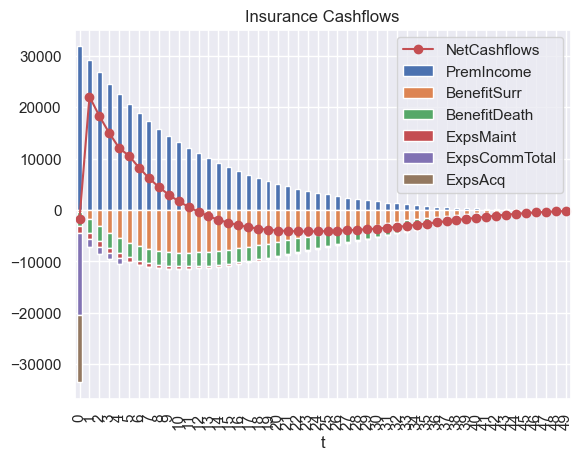

In [1]:
import os
import modelx as mx
import pandas as pd
import seaborn as sns
sns.set()

polid = 171
proj = mx.read_model('model').Projection[polid]

# %% Draw NetCashflows Graph
data = {'NetCashflows': [proj.NetInsurCF[t] for t in range(50)]}
ax = pd.DataFrame(data).plot.line(marker='o', color='r')

# %% Draw componets of net cashflows

vars = ['PremIncome',
        'BenefitSurr',
        'BenefitDeath',
        'ExpsMaint',
        'ExpsCommTotal',
        'ExpsAcq']


df = proj.cells[vars].to_frame(range(50))

df[vars[1:]] = df[vars[1:]].mul(-1)   # Change outflows to negatives
df.plot(kind='bar', stacked=True, ax=ax, title='Insurance Cashflows')